# Lord Of The Rings

## Reading the JSON file and examining its structure.

In [1]:
import json

# Read the JSON file
with open("/kaggle/input/lord-of-the-rings-character-data/LordOfTheRingsBook.json", "r") as file:
    lotr_data = json.load(file)

# Display the structure of the JSON file to understand its content
print(lotr_data)

[{'BookName': {'Case': 'TheFellowshipOfTheRing'}, 'ChapterName': ' A Long-expected Party ', 'ChapterData': 'When Mr. Bilbo Baggins of Bag End announced that he would shortly be celebrating his eleventy-first birthday with a party of special magnificence, there was much talk and excitement in Hobbiton.\r\nBilbo was very rich and very peculiar, and had been the wonder of the Shire for sixty years, ever since his remarkable disappearance and unexpected return. The riches he had brought back from his travels had now become a local legend, and it was popularly believed, whatever the old folk might say, that the Hill at Bag End was full of tunnels stuffed with treasure. And if that was not enough for fame, there was also his prolonged vigour to marvel at. Time wore on, but it seemed to have little effect on Mr. Baggins. At ninety he was much the same as at fifty. At ninety-nine they began to call him well-preserved, but unchanged would have been nearer the mark. There were some that shook th

In [2]:
# Display the first few items in the list to understand its content
lotr_data[:5]

[{'BookName': {'Case': 'TheFellowshipOfTheRing'},
  'ChapterName': ' A Long-expected Party ',
  'ChapterData': 'When Mr. Bilbo Baggins of Bag End announced that he would shortly be celebrating his eleventy-first birthday with a party of special magnificence, there was much talk and excitement in Hobbiton.\r\nBilbo was very rich and very peculiar, and had been the wonder of the Shire for sixty years, ever since his remarkable disappearance and unexpected return. The riches he had brought back from his travels had now become a local legend, and it was popularly believed, whatever the old folk might say, that the Hill at Bag End was full of tunnels stuffed with treasure. And if that was not enough for fame, there was also his prolonged vigour to marvel at. Time wore on, but it seemed to have little effect on Mr. Baggins. At ninety he was much the same as at fifty. At ninety-nine they began to call him well-preserved, but unchanged would have been nearer the mark. There were some that shoo

### **Let's proceed with the text-cleaning steps:** ###

1. Normalization

2. Removing stop words: Stop words are common words (e.g., "and", "the", "is") that are often removed from text processing tasks because they don't carry significant meaning on their own.

3. Stemming & Lemmatization

In [3]:
import nltk


from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, RegexpTokenizer
import string

# Download required resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

# Initialize tokenizer, stemmer, and lemmatizer
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# List of stop words
stop_words = set(stopwords.words('english'))

# Text cleaning function
def clean_text(text):
    # Normalize: Convert to lowercase and tokenize
    words = tokenizer.tokenize(text.lower())
    
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    
    # Stemming & Lemmatization
    stemmed_words = [stemmer.stem(word) for word in words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    
    return {
        "original": text,
        "normalized": " ".join(words),
        "stemmed": " ".join(stemmed_words),
        "lemmatized": " ".join(lemmatized_words)
    }

# Read the JSON file
with open("/kaggle/input/lord-of-the-rings-character-data/LordOfTheRingsBook.json", "r") as file:
    lotr_data = json.load(file)

# Apply text cleaning to all the dictionary items in the list
cleaned_lotr_data = [clean_text(item['ChapterData']) for item in lotr_data]

# If you want to see the cleaned data:
for cleaned_item in cleaned_lotr_data[:5]:
    print(cleaned_item)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
{'original': 'When Mr. Bilbo Baggins of Bag End announced that he would shortly be celebrating his eleventy-first birthday with a party of special magnificence, there was much talk and excitement in Hobbiton.\r\nBilbo was very rich and very peculiar, and had been the wonder of the Shire for sixty years, ever since his remarkable disappearance and unexpected return. The riches he had brought back from his travels had now become a local legend, and it was popularly believed, whatever the old folk might say, that the 

In [4]:
import json
import nltk
from nltk.tokenize import word_tokenize

# Read the JSON file
with open("/kaggle/input/lord-of-the-rings-character-data/LordOfTheRingsBook.json", "r") as file:
    lotr_data = json.load(file)

# Tokenize the text of each chapter
tokenized_lotr_data = [word_tokenize(item['ChapterData']) for item in lotr_data]

# If you want to see the tokenized data for the first few chapters:
for tokens in tokenized_lotr_data[:5]:
    print(tokens)

['When', 'Mr.', 'Bilbo', 'Baggins', 'of', 'Bag', 'End', 'announced', 'that', 'he', 'would', 'shortly', 'be', 'celebrating', 'his', 'eleventy-first', 'birthday', 'with', 'a', 'party', 'of', 'special', 'magnificence', ',', 'there', 'was', 'much', 'talk', 'and', 'excitement', 'in', 'Hobbiton', '.', 'Bilbo', 'was', 'very', 'rich', 'and', 'very', 'peculiar', ',', 'and', 'had', 'been', 'the', 'wonder', 'of', 'the', 'Shire', 'for', 'sixty', 'years', ',', 'ever', 'since', 'his', 'remarkable', 'disappearance', 'and', 'unexpected', 'return', '.', 'The', 'riches', 'he', 'had', 'brought', 'back', 'from', 'his', 'travels', 'had', 'now', 'become', 'a', 'local', 'legend', ',', 'and', 'it', 'was', 'popularly', 'believed', ',', 'whatever', 'the', 'old', 'folk', 'might', 'say', ',', 'that', 'the', 'Hill', 'at', 'Bag', 'End', 'was', 'full', 'of', 'tunnels', 'stuffed', 'with', 'treasure', '.', 'And', 'if', 'that', 'was', 'not', 'enough', 'for', 'fame', ',', 'there', 'was', 'also', 'his', 'prolonged', 'vig

In [5]:
import string

def clean_tokens(tokens):
    # Convert all tokens to lowercase
    tokens = [token.lower() for token in tokens]
    
    # Remove punctuation and numbers
    tokens = [token for token in tokens if token.isalpha()]
    
    # Further steps can be added for handling special characters, URLs, and emojis if needed
    
    return tokens

# Apply the cleaning to the tokenized data
cleaned_tokenized_data = [clean_tokens(tokens) for tokens in tokenized_lotr_data]

# If you want to see the cleaned tokenized data for the first few chapters:
for tokens in cleaned_tokenized_data[:5]:
    print(tokens)

['when', 'bilbo', 'baggins', 'of', 'bag', 'end', 'announced', 'that', 'he', 'would', 'shortly', 'be', 'celebrating', 'his', 'birthday', 'with', 'a', 'party', 'of', 'special', 'magnificence', 'there', 'was', 'much', 'talk', 'and', 'excitement', 'in', 'hobbiton', 'bilbo', 'was', 'very', 'rich', 'and', 'very', 'peculiar', 'and', 'had', 'been', 'the', 'wonder', 'of', 'the', 'shire', 'for', 'sixty', 'years', 'ever', 'since', 'his', 'remarkable', 'disappearance', 'and', 'unexpected', 'return', 'the', 'riches', 'he', 'had', 'brought', 'back', 'from', 'his', 'travels', 'had', 'now', 'become', 'a', 'local', 'legend', 'and', 'it', 'was', 'popularly', 'believed', 'whatever', 'the', 'old', 'folk', 'might', 'say', 'that', 'the', 'hill', 'at', 'bag', 'end', 'was', 'full', 'of', 'tunnels', 'stuffed', 'with', 'treasure', 'and', 'if', 'that', 'was', 'not', 'enough', 'for', 'fame', 'there', 'was', 'also', 'his', 'prolonged', 'vigour', 'to', 'marvel', 'at', 'time', 'wore', 'on', 'but', 'it', 'seemed', 't

## Temming and Lemmatization:

In [6]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def apply_stemming_and_lemmatization(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return {
        "original": tokens,
        "stemmed": stemmed_tokens,
        "lemmatized": lemmatized_tokens
    }

# Apply stemming and lemmatization to the cleaned tokenized data
processed_data = [apply_stemming_and_lemmatization(tokens) for tokens in cleaned_tokenized_data]

# If you want to see the stemmed and lemmatized data for the first few chapters:
for data in processed_data[:5]:
    print(data)

{'original': ['when', 'bilbo', 'baggins', 'of', 'bag', 'end', 'announced', 'that', 'he', 'would', 'shortly', 'be', 'celebrating', 'his', 'birthday', 'with', 'a', 'party', 'of', 'special', 'magnificence', 'there', 'was', 'much', 'talk', 'and', 'excitement', 'in', 'hobbiton', 'bilbo', 'was', 'very', 'rich', 'and', 'very', 'peculiar', 'and', 'had', 'been', 'the', 'wonder', 'of', 'the', 'shire', 'for', 'sixty', 'years', 'ever', 'since', 'his', 'remarkable', 'disappearance', 'and', 'unexpected', 'return', 'the', 'riches', 'he', 'had', 'brought', 'back', 'from', 'his', 'travels', 'had', 'now', 'become', 'a', 'local', 'legend', 'and', 'it', 'was', 'popularly', 'believed', 'whatever', 'the', 'old', 'folk', 'might', 'say', 'that', 'the', 'hill', 'at', 'bag', 'end', 'was', 'full', 'of', 'tunnels', 'stuffed', 'with', 'treasure', 'and', 'if', 'that', 'was', 'not', 'enough', 'for', 'fame', 'there', 'was', 'also', 'his', 'prolonged', 'vigour', 'to', 'marvel', 'at', 'time', 'wore', 'on', 'but', 'it',

In [7]:
def apply_pos_tagging(tokens):
    pos_tags = nltk.pos_tag(tokens)
    return pos_tags

# Apply POS tagging to the cleaned tokenized data
pos_tagged_data = [apply_pos_tagging(tokens) for tokens in cleaned_tokenized_data]

# If you want to see the POS tagged data for the first few chapters:
for tags in pos_tagged_data[:5]:
    print(tags)

[('when', 'WRB'), ('bilbo', 'NN'), ('baggins', 'NNS'), ('of', 'IN'), ('bag', 'JJ'), ('end', 'NN'), ('announced', 'VBD'), ('that', 'IN'), ('he', 'PRP'), ('would', 'MD'), ('shortly', 'RB'), ('be', 'VB'), ('celebrating', 'VBG'), ('his', 'PRP$'), ('birthday', 'NN'), ('with', 'IN'), ('a', 'DT'), ('party', 'NN'), ('of', 'IN'), ('special', 'JJ'), ('magnificence', 'NN'), ('there', 'EX'), ('was', 'VBD'), ('much', 'JJ'), ('talk', 'NN'), ('and', 'CC'), ('excitement', 'NN'), ('in', 'IN'), ('hobbiton', 'NN'), ('bilbo', 'NN'), ('was', 'VBD'), ('very', 'RB'), ('rich', 'JJ'), ('and', 'CC'), ('very', 'RB'), ('peculiar', 'JJ'), ('and', 'CC'), ('had', 'VBD'), ('been', 'VBN'), ('the', 'DT'), ('wonder', 'NN'), ('of', 'IN'), ('the', 'DT'), ('shire', 'NN'), ('for', 'IN'), ('sixty', 'NN'), ('years', 'NNS'), ('ever', 'RB'), ('since', 'IN'), ('his', 'PRP$'), ('remarkable', 'JJ'), ('disappearance', 'NN'), ('and', 'CC'), ('unexpected', 'JJ'), ('return', 'NN'), ('the', 'DT'), ('riches', 'NNS'), ('he', 'PRP'), ('ha

## Conversation analysis

In [8]:
import pandas as pd

# Read the WordsByCharacter.csv file
words_by_character_df = pd.read_csv('/kaggle/input/lord-of-the-rings-character-data/WordsByCharacter.csv')

# Display the first few rows to understand its structure
words_by_character_df.head()

Film                 Chapter  Character    Race  \
0  The Fellowship Of The Ring            01: Prologue      Bilbo  Hobbit   
1  The Fellowship Of The Ring            01: Prologue     Elrond     Elf   
2  The Fellowship Of The Ring            01: Prologue  Galadriel     Elf   
3  The Fellowship Of The Ring            01: Prologue     Gollum  Gollum   
4  The Fellowship Of The Ring  02: Concerning Hobbits      Bilbo  Hobbit   

   Words  
0      4  
1      5  
2    460  
3     20  
4    214

The WordsByCharacter.csv dataset seems to be well-structured and provides a breakdown of the number of words spoken by each character in each chapter of each film. It also provides the race of each character.

### Speaking volume of characters by chapter and film.

In [9]:
# Calculate the speaking volume of characters by chapter and film
speaking_volume_by_character = words_by_character_df.groupby(['Film', 'Chapter', 'Character']).agg({'Words': 'sum'}).reset_index()

# Display the top characters by speaking volume for demonstration
top_characters_by_volume = speaking_volume_by_character.sort_values(by='Words', ascending=False).head(10)

top_characters_by_volume

Film                         Chapter  Character  \
43   The Fellowship Of The Ring      10: The Shadow Of The Past    Gandalf   
2    The Fellowship Of The Ring                    01: Prologue  Galadriel   
151  The Fellowship Of The Ring       34: A Journey In The Dark    Gandalf   
10   The Fellowship Of The Ring            04: Very Old Friends      Bilbo   
13   The Fellowship Of The Ring       05: A Long Expected Party      Bilbo   
541              The Two Towers  14: The Passage Of The Marshes     Gollum   
236      The Return Of The King        04: The Voice Of Saruman    Saruman   
544              The Two Towers             15: The White Rider    Gandalf   
50   The Fellowship Of The Ring           12: Saruman The White    Saruman   
268      The Return Of The King       12: The Decline Of Gondor    Gandalf   

     Words  
43     541  
2      460  
151    349  
10     339  
13     326  
541    304  
236    301  
544    298  
50     274  
268    268

The table above displays the top characters by speaking volume across chapters and films. As we can see, characters like Gandalf, Galadriel, and Bilbo have significant speaking volumes in specific chapters.

### Speaking volume of races by chapter and film.

In [10]:
# Calculate the speaking volume of races by chapter and film
speaking_volume_by_race = words_by_character_df.groupby(['Film', 'Chapter', 'Race']).agg({'Words': 'sum'}).reset_index()

# Display the top races by speaking volume for demonstration
top_races_by_volume = speaking_volume_by_race.sort_values(by='Words', ascending=False).head(10)

top_races_by_volume

Film                         Chapter    Race  Words
19   The Fellowship Of The Ring      10: The Shadow Of The Past   Ainur    541
0    The Fellowship Of The Ring                    01: Prologue     Elf    465
385              The Two Towers         41: Sons Of The Steward     Men    423
131      The Return Of The King        04: The Voice Of Saruman   Ainur    412
9    The Fellowship Of The Ring       05: A Long Expected Party  Hobbit    411
23   The Fellowship Of The Ring           12: Saruman The White   Ainur    359
79   The Fellowship Of The Ring       34: A Journey In The Dark   Ainur    349
7    The Fellowship Of The Ring            04: Very Old Friends  Hobbit    347
330              The Two Towers  14: The Passage Of The Marshes  Gollum    304
305              The Two Towers       03: The Taming of Sméagol  Hobbit    304

The table above shows the top races by speaking volume across different chapters and films. From this, we observe that races like Ainur, Elf, and Men have significant speaking volumes in certain chapters.

### Identify the main characters based on their overall speaking volume across all chapters and films.

In [11]:
# Calculate the total speaking volume for each character across all chapters and films
overall_speaking_volume_by_character = words_by_character_df.groupby('Character').agg({'Words': 'sum'}).reset_index()

# Identify main characters by their total speaking volume
main_characters_by_volume = overall_speaking_volume_by_character.sort_values(by='Words', ascending=False).head(10)

main_characters_by_volume

Character  Words
22    Gandalf   4828
59        Sam   2525
0     Aragorn   2322
18      Frodo   2281
2       Bilbo   1366
66    Theoden   1327
25     Gollum   1294
24      Gimli   1265
54     Pippin   1261
20  Galadriel   1252

The table above lists the main characters based on their overall speaking volume across all chapters and films. Gandalf leads the list with the highest word count, followed by characters like Sam, Aragorn, and Frodo.

## CHALLENGE

Let's start with the data preparation. We'll focus on the main characters (as identified from the previous analysis) to avoid cluttering the visualization.

In [12]:
# Filter the dataset to include only the main characters identified earlier
main_characters_list = main_characters_by_volume['Character'].tolist()
filtered_data = speaking_volume_by_character[speaking_volume_by_character['Character'].isin(main_characters_list)]

# Pivot the data for easier visualization
pivot_data = filtered_data.pivot_table(index=['Film', 'Chapter'], columns='Character', values='Words', aggfunc='sum').reset_index()

pivot_data.head()

Character                        Film                    Chapter  Aragorn  \
0          The Fellowship Of The Ring               01: Prologue      NaN   
1          The Fellowship Of The Ring     02: Concerning Hobbits      NaN   
2          The Fellowship Of The Ring              03: The Shire      NaN   
3          The Fellowship Of The Ring       04: Very Old Friends      NaN   
4          The Fellowship Of The Ring  05: A Long Expected Party      NaN   

Character  Bilbo  Frodo  Galadriel  Gandalf  Gimli  Gollum  Pippin  Sam  \
0            4.0    NaN      460.0      NaN    NaN    20.0     NaN  NaN   
1          214.0    NaN        NaN      NaN    NaN     NaN     NaN  NaN   
2           70.0  128.0        NaN    197.0    NaN     NaN     NaN  NaN   
3          339.0    NaN        NaN     64.0    NaN     NaN     NaN  NaN   
4          326.0   32.0        NaN     12.0    NaN     NaN    15.0  7.0   

Character  Theoden  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN

**We'll visualize this data to understand the speaking trends of the main characters across the timeline (chapters).**

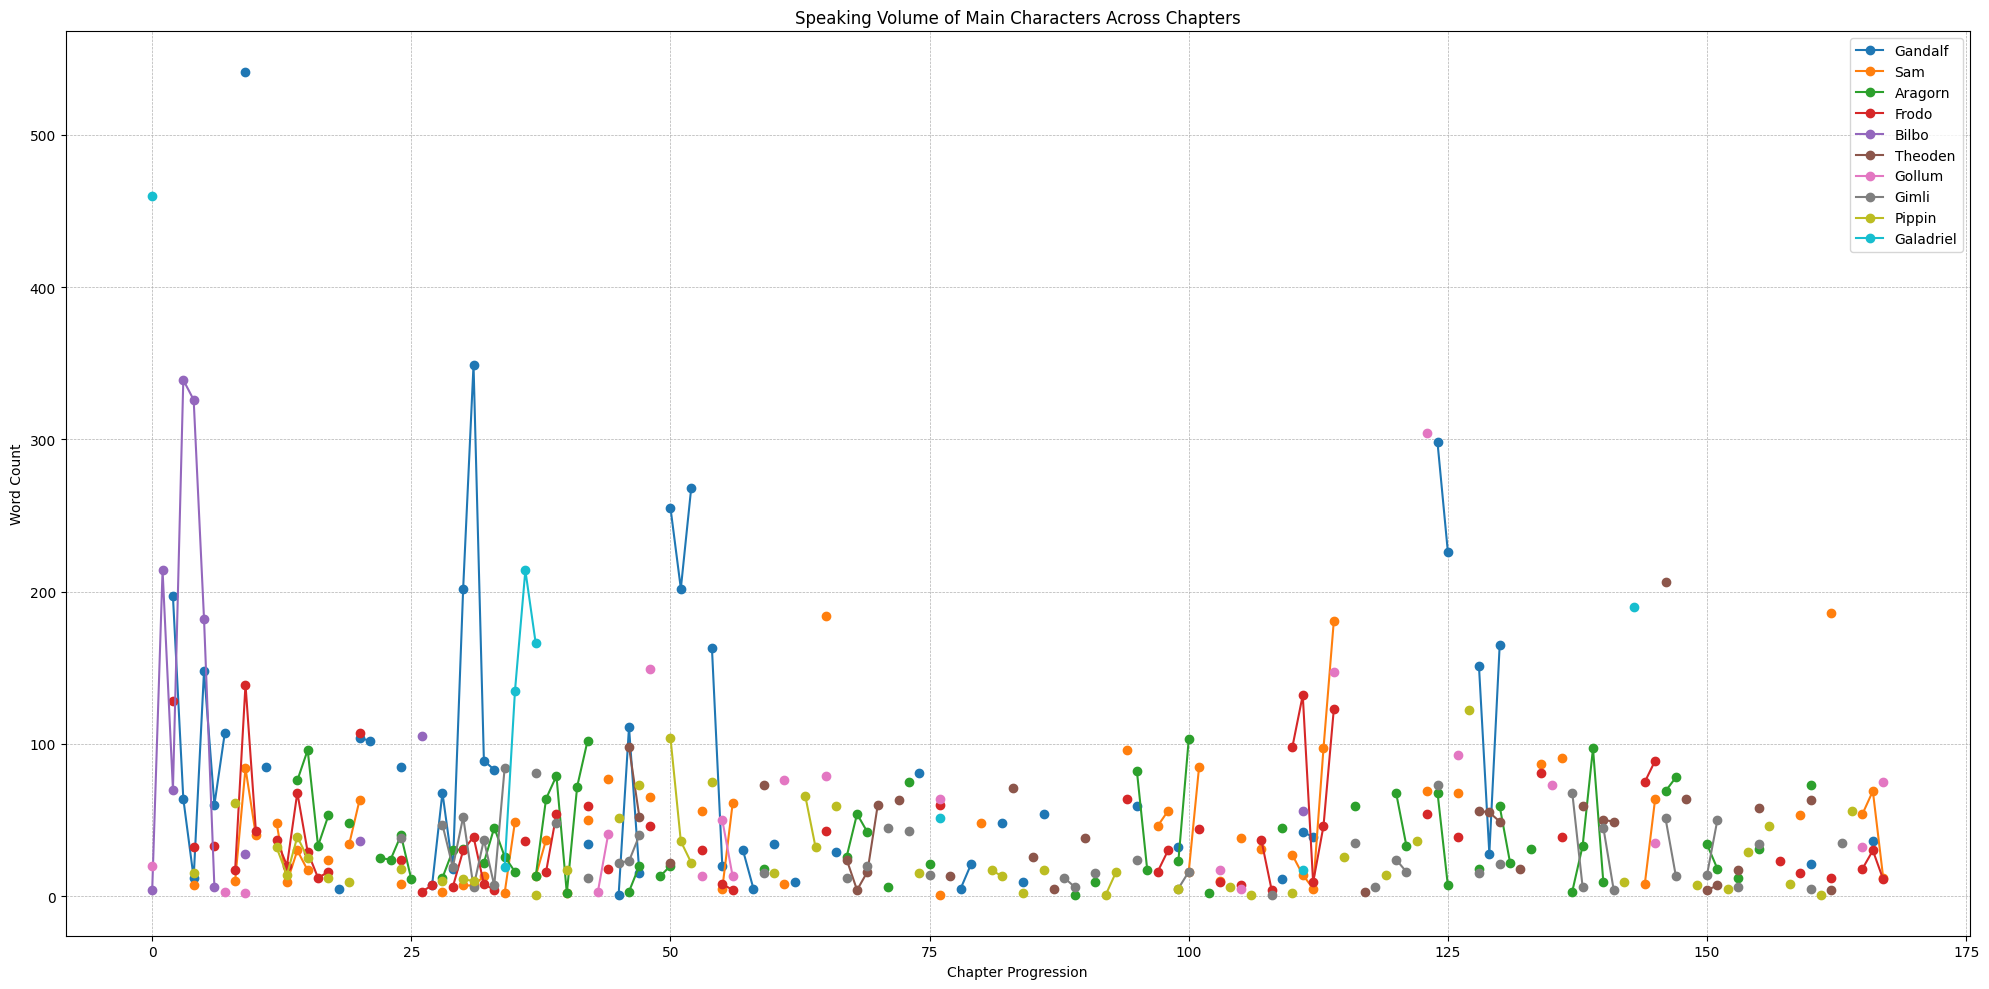

In [13]:
import matplotlib.pyplot as plt

# Plotting the speaking volume of main characters across chapters
plt.figure(figsize=(20, 10))

# Loop through each main character and plot their speaking volume
for character in main_characters_list:
    plt.plot(pivot_data.index, pivot_data[character], label=character, marker='o')

plt.title('Speaking Volume of Main Characters Across Chapters')
plt.xlabel('Chapter Progression')
plt.ylabel('Word Count')
plt.legend(loc="upper right")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

From the plot, we can observe the following trends:

1. Gandalf has relatively consistent speaking volumes across various points in the story, with some peaks in the middle.
2. Sam becomes more vocal towards the end, especially in the last chapters of the story.
3. Aragorn and Frodo also have significant speaking volumes in the latter parts of the narrative.
4. Galadriel has a significant speaking volume in the initial chapters but becomes less vocal as the story progresses.
4. Gollum has peaks in speaking volume in the middle and towards the end.
5. Bilbo is more vocal in the initial chapters but less so in the latter parts.

## Summarize each chapter with Sumy

In [14]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

# Define a function to summarize using Sumy
def sumy_summarize(text, num_sentences=5):
    parser = PlaintextParser.from_string(text, Tokenizer("english"))
    summarizer = LsaSummarizer()
    summary = summarizer(parser.document, num_sentences)
    return " ".join([sentence._text for sentence in summary])

# Assuming lotr_data is already defined in your code
chapter_texts = [item['ChapterData'] for item in lotr_data]

# Summarize each chapter using Sumy's method
sumy_summaries = [sumy_summarize(chapter, num_sentences=5) for chapter in chapter_texts]

# Display the summaries for each chapter with chapter number
for index, summary in enumerate(sumy_summaries, start=1):
    print(f"Chapter {index} Summary:")
    print(summary)
    print("\n" + "-"*50 + "\n")

Chapter 1 Summary:
It beats me why any Baggins of Hobbiton should go looking for a wife away there in Buckland, where folks are so queer.' Anyway: there was this Mr. Frodo left an orphan and stranded, as you might say, among those queer Bucklanders, being brought up anyhow in Brandy Hall. The guests were not disappointed: they had a very pleasant feast, in fact an engrossing entertainment: rich, abundant, varied, and prolonged. Then there was a dead silence, until suddenly, after several deep breaths, every Baggins, Boffin, Took, Brandybuck, Grubb, Chubb, Burrows, Bolger, Bracegirdle, Brockhouse, Goodbody, Hornblower, and Proudfoot began to talk at once. By mid-day, when even the best-fed were out and about again, there was a large crowd at Bag End, uninvited but not unexpected.

--------------------------------------------------

Chapter 2 Summary:
But it was an old tradition that away over there stood the Grey Havens, from which at times elven-ships set sail, never to return. During 

**Using Raw Text with Gensim: We'll start by summarizing the raw text of each chapter using Sumy's summarization function.**

In [15]:
from nltk.tokenize import word_tokenize
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

def sumy_summarize(text, num_sentences=10):  # Adjust num_sentences based on your needs
    parser = PlaintextParser.from_string(text, Tokenizer("english"))
    summarizer = LsaSummarizer()
    summary = summarizer(parser.document, num_sentences)
    return " ".join([sentence._text for sentence in summary])

# Assuming lotr_data and chapter_texts are defined in your environment
tokenized_chapters = [word_tokenize(chapter) for chapter in chapter_texts]

# 1. Summarize using Raw Text
sumy_raw_summaries = [sumy_summarize(chapter) for chapter in chapter_texts]

# Display the summaries for each chapter with chapter number
for index, summary in enumerate(sumy_raw_summaries, start=1):
    print(f"Chapter {index} Summary:")
    print(summary)
    print("\n" + "-"*50 + "\n")

# 2. Summarize using Extracted Tokens
reconstructed_texts = [" ".join(tokens) for tokens in tokenized_chapters]
sumy_token_summaries = [sumy_summarize(reconstructed_text) for reconstructed_text in reconstructed_texts]

# Display the summaries for each chapter with chapter number using tokens
for index, summary in enumerate(sumy_token_summaries, start=1):
    print(f"Chapter {index} Summary (Token-based):")
    print(summary)
    print("\n" + "-"*50 + "\n")

Chapter 1 Summary:
'You had better come and live here, Frodo my lad,' said Bilbo one day; 'and then we can celebrate our birthday-parties comfortably together.' It beats me why any Baggins of Hobbiton should go looking for a wife away there in Buckland, where folks are so queer.' Anyway: there was this Mr. Frodo left an orphan and stranded, as you might say, among those queer Bucklanders, being brought up anyhow in Brandy Hall. Bilbo was busy: writing invitations, ticking off answers, packing up presents, and making some private preparations of his own. A very few were overlooked by accident, but as they turned up all the same, that did not matter. At other times there were merely lots of people eating and drinking – continuously from elevenses until six-thirty, when the fireworks started. The guests were not disappointed: they had a very pleasant feast, in fact an engrossing entertainment: rich, abundant, varied, and prolonged. Then there was a dead silence, until suddenly, after seve

## Summarize Text With Python And Machine Learning

In [ ]:
from transformers import pipeline
from nltk.tokenize import word_tokenize

# Initialize the summarization pipeline with a specific model
summarizer = pipeline("summarization", model="t5-small", tokenizer="t5-small")

# Tokenize each chapter (only the first 5 chapters)
tokenized_chapters = [word_tokenize(chapter) for chapter in chapter_texts[:5]]

# Summarize using Raw Text (only for the first 5 chapters)
hf_raw_summaries = []
for index, chapter in enumerate(chapter_texts[:5], start=1):
    try:
        summary = summarizer(chapter, max_length=50, min_length=30, do_sample=False)[0]['summary_text']
        hf_raw_summaries.append(summary)
        print(f"Chapter {index} Summary:")
        print(summary)
        print("\n" + "-"*50 + "\n")
    except Exception as e:
        print(f"Error summarizing chapter {index}: {e}")

# Summarize using Extracted Tokens (only for the first 5 chapters)
reconstructed_texts = [" ".join(tokens) for tokens in tokenized_chapters]
hf_token_summaries = []
for index, reconstructed_text in enumerate(reconstructed_texts, start=1):
    try:
        summary = summarizer(reconstructed_text, max_length=100, min_length=25, do_sample=False)[0]['summary_text']
        hf_token_summaries.append(summary)
        print(f"Chapter {index} Summary (Token-based):")
        print(summary)
        print("\n" + "-"*50 + "\n")
    except Exception as e:
        print(f"Error summarizing chapter {index} (Token-based): {e}")

Token indices sequence length is longer than the specified maximum sequence length for this model (15167 > 512). Running this sequence through the model will result in indexing errors


Chapter 1 Summary:
'you are a good man,' said the wizard . 'i'm not a thief,' he said, 'but i'll be able to tell you' '

--------------------------------------------------

Chapter 2 Summary:
'the Ring is a great ring,' said frodalf . he said, 'you are a good man, and i am not a bad man,' he added .

--------------------------------------------------

Chapter 3 Summary:
'I am a good man,' said frodo . he said, 'you are a great man, and i am not a bad man.' he 'does

--------------------------------------------------

Chapter 4 Summary:
'i'm a good friend,' said the farmer. 'I'm going to go to the Ferry,' he said . he shook his head and said: 'you'll

--------------------------------------------------

Chapter 5 Summary:
'you are not a good nut,' said frodo, who 'doesn't have any luck' he said . 'we are going to do our best in a

--------------------------------------------------

Chapter 1 Summary (Token-based):
'you are a good man,' said gandalf . 'i'm not a bad person,' he said, 'but

[Hafida Belayd](https://www.linkedin.com/in/hafida-belayd/)


Challenge accepted! 


For more informations and Ressources : [Check Article : Fabian Werkmeister](https://fabianwerkmeister.notion.site/Lord-of-the-Rings-711cd3b1a16e4b26ac6008de12886021)